In [1]:
# Install required packages
import subprocess
import sys

packages = ['numpy', 'matplotlib', 'numba', 'scipy', 'pillow', 'tqdm']
for pkg in packages:
    subprocess.check_call([sys.executable, '-m', 'pip', 'install', '-q', pkg])

print("✅ All packages installed!")

✅ All packages installed!


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display, Image
from numba import jit, prange
from concurrent.futures import ProcessPoolExecutor, ThreadPoolExecutor
import multiprocessing
import time
import os
from tqdm.notebook import tqdm
from scipy.integrate import odeint
import warnings
warnings.filterwarnings('ignore')

# System info
print(f"🖥️  CPU Cores: {multiprocessing.cpu_count()}")
print(f"🐍 Python: {sys.version.split()[0]}")
print(f"📊 NumPy: {np.__version__}")
print("\n🔥 Ready to push the limits!")

🖥️  CPU Cores: 4
🐍 Python: 3.12.1
📊 NumPy: 2.3.5

🔥 Ready to push the limits!


## 1. 🌀 Ultra High-Resolution Mandelbrot Fractal
Using JIT compilation and parallel processing for maximum speed!

🌀 Generating 4K Mandelbrot Fractal...
⏱️  Generated 3840x2160 pixels in 16.94 seconds
📈 Performance: 0.49 billion iterations/second


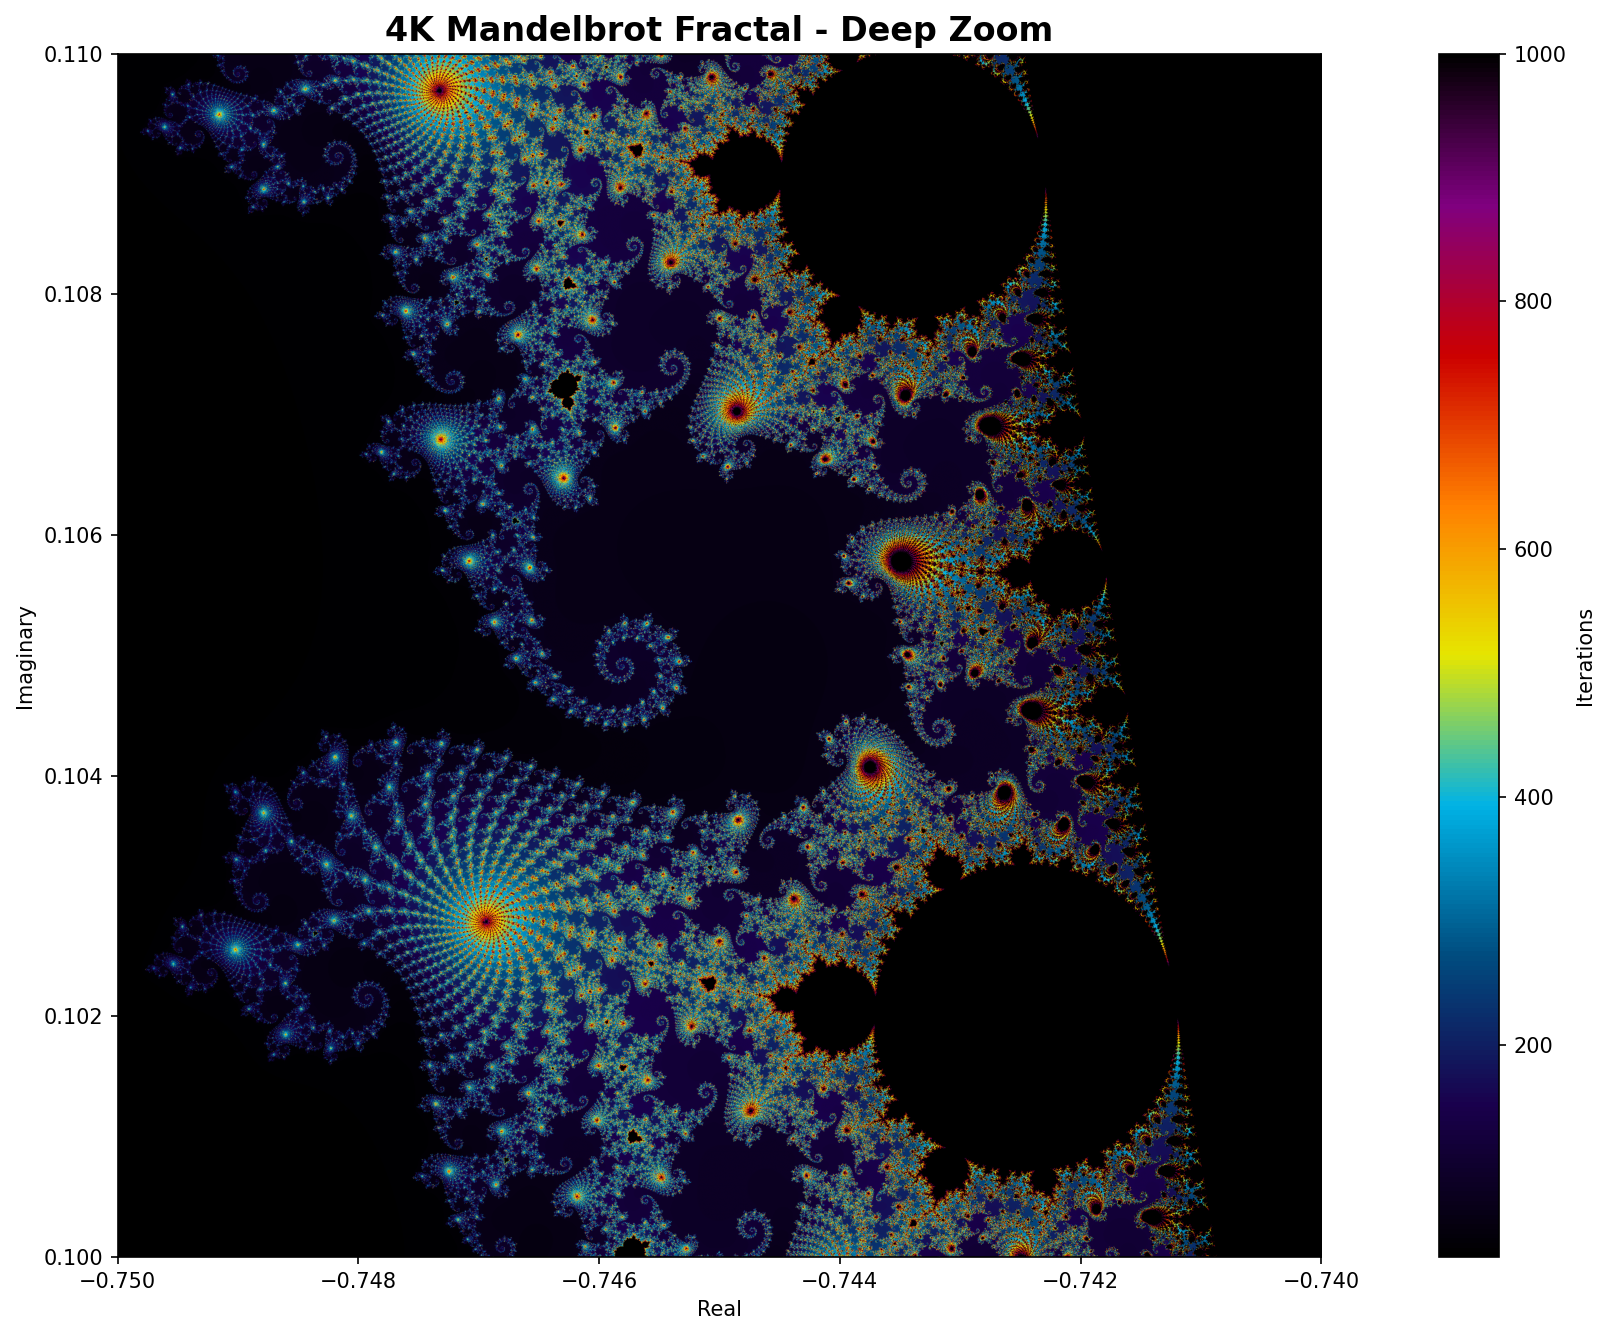

💾 Saved as mandelbrot_4k.png


In [3]:
@jit(nopython=True, parallel=True)
def mandelbrot_set(xmin, xmax, ymin, ymax, width, height, max_iter):
    """Generate Mandelbrot set using JIT compilation and parallel processing"""
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    result = np.zeros((height, width))
    
    for i in prange(height):
        for j in range(width):
            c = complex(x[j], y[i])
            z = 0j
            for k in range(max_iter):
                z = z*z + c
                if abs(z) > 2:
                    # Smooth coloring
                    result[i, j] = k + 1 - np.log(np.log2(abs(z)))
                    break
            else:
                result[i, j] = max_iter
    return result

# Generate high-resolution Mandelbrot
print("🌀 Generating 4K Mandelbrot Fractal...")
start = time.time()

# 4K resolution!
width, height = 3840, 2160
max_iter = 1000

# Interesting region with beautiful spirals
mandelbrot = mandelbrot_set(-0.75, -0.74, 0.1, 0.11, width, height, max_iter)

elapsed = time.time() - start
print(f"⏱️  Generated {width}x{height} pixels in {elapsed:.2f} seconds")
print(f"📈 Performance: {(width*height*max_iter)/elapsed/1e9:.2f} billion iterations/second")

# Create stunning visualization
fig, ax = plt.subplots(figsize=(16, 9), dpi=150)
colors = [(0, 0, 0), (0.1, 0, 0.3), (0, 0.3, 0.5), (0, 0.7, 0.9), 
          (0.9, 0.9, 0), (1, 0.5, 0), (0.8, 0, 0), (0.5, 0, 0.5), (0, 0, 0)]
cmap = LinearSegmentedColormap.from_list('fractal', colors, N=256)
im = ax.imshow(mandelbrot, cmap=cmap, extent=[-0.75, -0.74, 0.1, 0.11])
ax.set_title('4K Mandelbrot Fractal - Deep Zoom', fontsize=16, fontweight='bold')
ax.set_xlabel('Real')
ax.set_ylabel('Imaginary')
plt.colorbar(im, label='Iterations')
plt.tight_layout()
plt.savefig('mandelbrot_4k.png', dpi=200, bbox_inches='tight')
plt.show()
print("💾 Saved as mandelbrot_4k.png")

## 2. 🦋 Lorenz Attractor - Chaos Theory Visualization
The famous butterfly effect in 3D!

🦋 Computing Lorenz Attractor trajectories...


Computing trajectories:   0%|          | 0/50 [00:00<?, ?it/s]

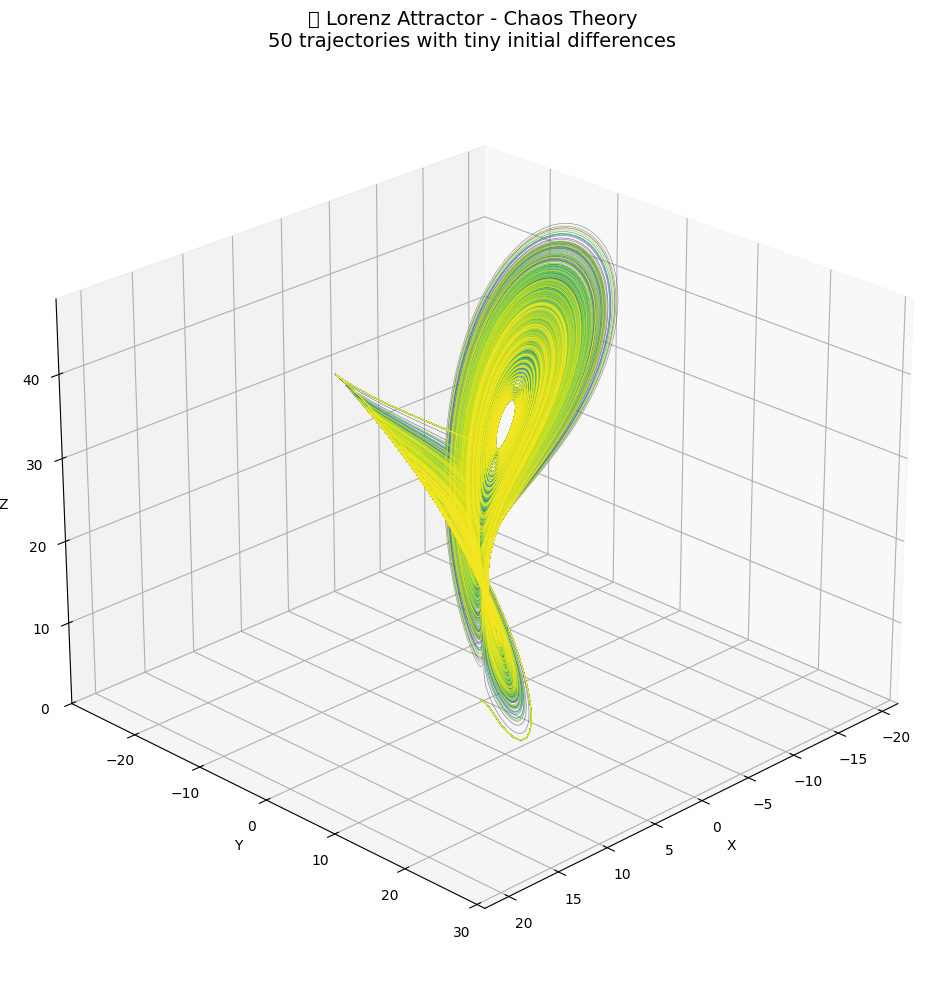

💾 Saved as lorenz_attractor.png


In [4]:
def lorenz_system(state, t, sigma=10, rho=28, beta=8/3):
    """Lorenz system differential equations"""
    x, y, z = state
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

print("🦋 Computing Lorenz Attractor trajectories...")

# Generate multiple trajectories with slightly different initial conditions
t = np.linspace(0, 50, 10000)
num_trajectories = 50

trajectories = []
for i in tqdm(range(num_trajectories), desc="Computing trajectories"):
    # Tiny perturbation in initial conditions
    initial = [1 + 0.01*np.random.randn(), 1 + 0.01*np.random.randn(), 1 + 0.01*np.random.randn()]
    solution = odeint(lorenz_system, initial, t)
    trajectories.append(solution)

# Create 3D visualization
fig = plt.figure(figsize=(14, 10))
ax = fig.add_subplot(111, projection='3d')

colors = plt.cm.viridis(np.linspace(0, 1, num_trajectories))
for i, traj in enumerate(trajectories):
    ax.plot(traj[:, 0], traj[:, 1], traj[:, 2], color=colors[i], alpha=0.6, linewidth=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('🦋 Lorenz Attractor - Chaos Theory\n50 trajectories with tiny initial differences', fontsize=14)
ax.view_init(elev=25, azim=45)
plt.tight_layout()
plt.savefig('lorenz_attractor.png', dpi=150, bbox_inches='tight')
plt.show()
print("💾 Saved as lorenz_attractor.png")

## 3. 🌌 N-Body Gravitational Simulation
Simulating a mini galaxy with thousands of particles!

🌌 Simulating 1000 bodies for 200 steps...


Simulating:   0%|          | 0/200 [00:00<?, ?it/s]

⏱️  Simulation completed in 15.56 seconds


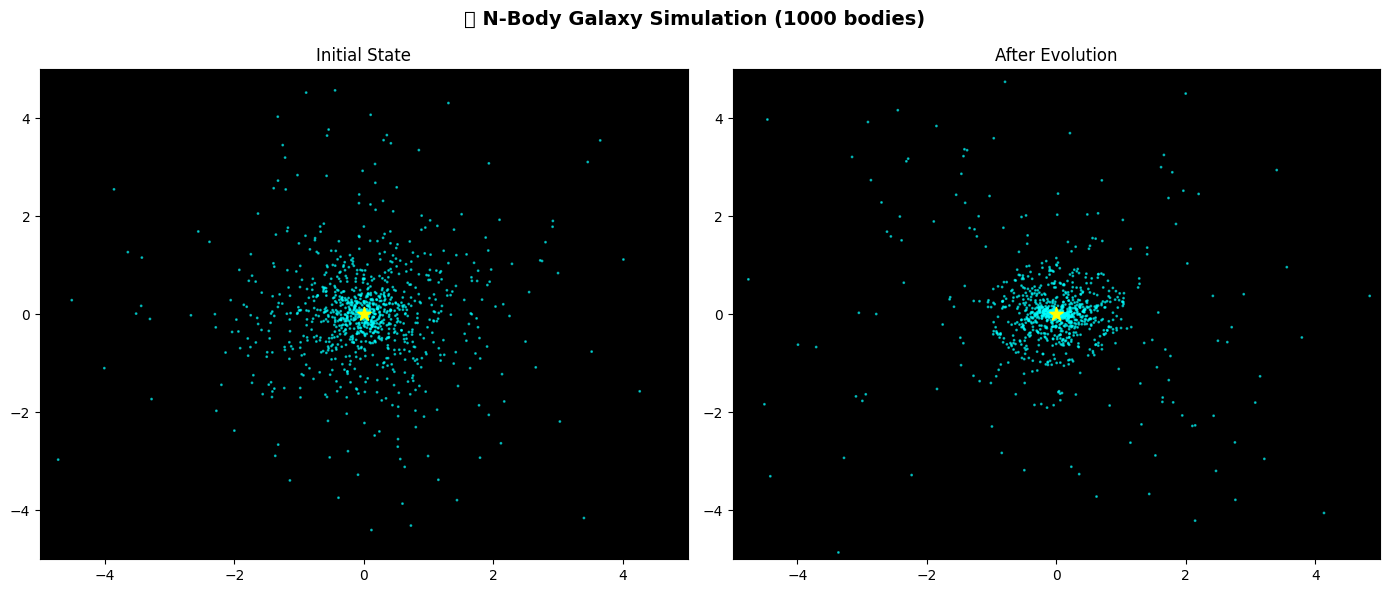

In [5]:
@jit(nopython=True, parallel=True)
def compute_accelerations(positions, masses, G=1.0, softening=0.1):
    """Compute gravitational accelerations for all bodies"""
    n = len(masses)
    accelerations = np.zeros_like(positions)
    
    for i in prange(n):
        for j in range(n):
            if i != j:
                r = positions[j] - positions[i]
                dist = np.sqrt(np.sum(r**2) + softening**2)
                accelerations[i] += G * masses[j] * r / (dist**3)
    return accelerations

def run_nbody_simulation(n_bodies=1000, n_steps=200, dt=0.01):
    """Run N-body gravitational simulation"""
    print(f"🌌 Simulating {n_bodies} bodies for {n_steps} steps...")
    
    # Initialize galaxy-like distribution
    np.random.seed(42)
    
    # Spiral arm pattern
    theta = np.random.uniform(0, 4*np.pi, n_bodies)
    r = np.random.exponential(1, n_bodies)
    
    positions = np.zeros((n_bodies, 3))
    positions[:, 0] = r * np.cos(theta) + 0.2 * np.random.randn(n_bodies)
    positions[:, 1] = r * np.sin(theta) + 0.2 * np.random.randn(n_bodies)
    positions[:, 2] = 0.1 * np.random.randn(n_bodies)
    
    # Circular velocities
    velocities = np.zeros((n_bodies, 3))
    velocities[:, 0] = -np.sin(theta) * np.sqrt(r) * 0.5
    velocities[:, 1] = np.cos(theta) * np.sqrt(r) * 0.5
    
    masses = np.ones(n_bodies) * 0.001
    masses[0] = 1.0  # Central black hole
    positions[0] = [0, 0, 0]
    velocities[0] = [0, 0, 0]
    
    # Store history
    history = [positions.copy()]
    
    for step in tqdm(range(n_steps), desc="Simulating"):
        acc = compute_accelerations(positions, masses)
        velocities += acc * dt
        positions += velocities * dt
        if step % 5 == 0:
            history.append(positions.copy())
    
    return history, masses

# Run simulation
start = time.time()
history, masses = run_nbody_simulation(n_bodies=1000, n_steps=200)
elapsed = time.time() - start
print(f"⏱️  Simulation completed in {elapsed:.2f} seconds")

# Visualize final state
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121)
sizes = masses * 50 + 1
ax1.scatter(history[0][:, 0], history[0][:, 1], s=sizes, c='cyan', alpha=0.6)
ax1.scatter(0, 0, s=100, c='yellow', marker='*')
ax1.set_xlim(-5, 5)
ax1.set_ylim(-5, 5)
ax1.set_title('Initial State', fontsize=12)
ax1.set_facecolor('black')

ax2 = fig.add_subplot(122)
ax2.scatter(history[-1][:, 0], history[-1][:, 1], s=sizes, c='cyan', alpha=0.6)
ax2.scatter(history[-1][0, 0], history[-1][0, 1], s=100, c='yellow', marker='*')
ax2.set_xlim(-5, 5)
ax2.set_ylim(-5, 5)
ax2.set_title('After Evolution', fontsize=12)
ax2.set_facecolor('black')

fig.suptitle('🌌 N-Body Galaxy Simulation (1000 bodies)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('nbody_galaxy.png', dpi=150, bbox_inches='tight', facecolor='black')
plt.show()

## 4. 🎨 Neural Network Art Generator
Creating abstract art using random neural networks!

🎨 Generating Neural Network Art...


Creating artworks:   0%|          | 0/6 [00:00<?, ?it/s]

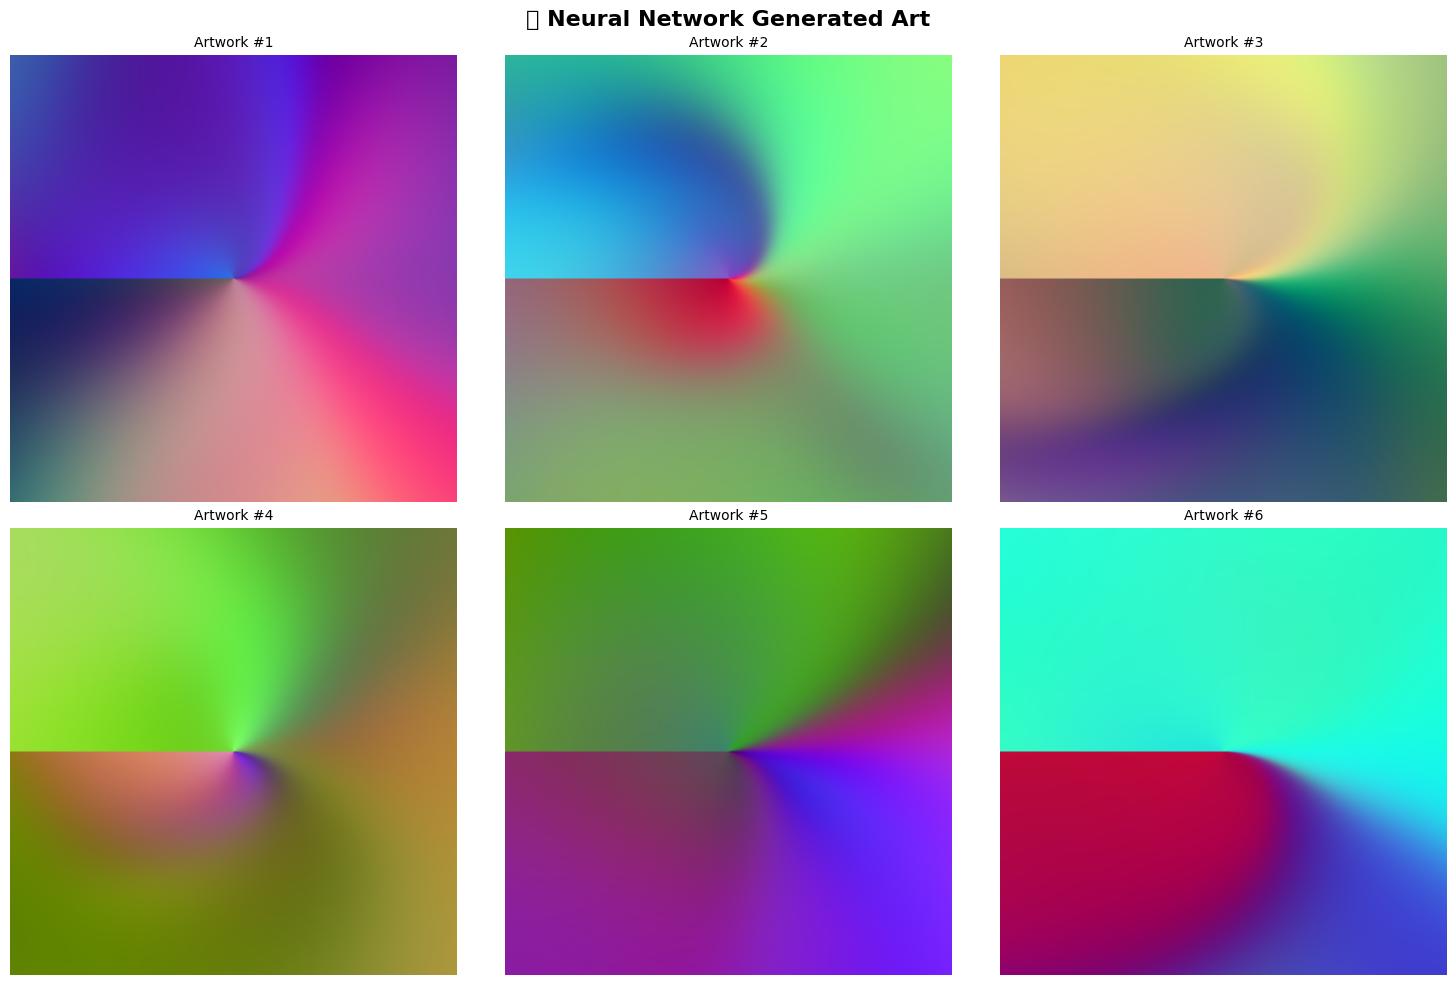

💾 Saved as neural_art.png


In [6]:
class NeuralArtGenerator:
    """Generate abstract art using random neural networks"""
    
    def __init__(self, width=800, height=800, hidden_layers=8, neurons=32):
        self.width = width
        self.height = height
        self.layers = hidden_layers
        self.neurons = neurons
        self._init_weights()
    
    def _init_weights(self):
        np.random.seed(int(time.time()) % 10000)
        self.weights = []
        self.biases = []
        
        # Input: x, y, r, theta
        in_size = 4
        for i in range(self.layers):
            out_size = self.neurons if i < self.layers - 1 else 3  # RGB output
            w = np.random.randn(in_size, out_size) * np.sqrt(2.0 / in_size)
            b = np.random.randn(out_size) * 0.1
            self.weights.append(w)
            self.biases.append(b)
            in_size = out_size
    
    def _activation(self, x, func='tanh'):
        if func == 'tanh':
            return np.tanh(x)
        elif func == 'sin':
            return np.sin(x)
        elif func == 'sigmoid':
            return 1 / (1 + np.exp(-np.clip(x, -500, 500)))
    
    def generate(self):
        # Create coordinate grids
        x = np.linspace(-1, 1, self.width)
        y = np.linspace(-1, 1, self.height)
        xx, yy = np.meshgrid(x, y)
        
        # Additional features
        r = np.sqrt(xx**2 + yy**2)
        theta = np.arctan2(yy, xx)
        
        # Flatten and stack
        inputs = np.stack([xx.flatten(), yy.flatten(), r.flatten(), theta.flatten()], axis=1)
        
        # Forward pass
        activations = ['tanh', 'sin', 'tanh', 'sin', 'tanh', 'sin', 'tanh', 'sigmoid']
        h = inputs
        for i, (w, b) in enumerate(zip(self.weights, self.biases)):
            h = h @ w + b
            func = activations[i % len(activations)]
            h = self._activation(h, func)
        
        # Reshape to image
        rgb = h.reshape(self.height, self.width, 3)
        rgb = (rgb - rgb.min()) / (rgb.max() - rgb.min())
        return rgb

# Generate multiple artworks
print("🎨 Generating Neural Network Art...")

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i in tqdm(range(6), desc="Creating artworks"):
    generator = NeuralArtGenerator(width=512, height=512, hidden_layers=8, neurons=32)
    art = generator.generate()
    axes[i].imshow(art)
    axes[i].axis('off')
    axes[i].set_title(f'Artwork #{i+1}', fontsize=10)

fig.suptitle('🎨 Neural Network Generated Art', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('neural_art.png', dpi=150, bbox_inches='tight')
plt.show()
print("💾 Saved as neural_art.png")

## 5. 🔥 Julia Set Exploration
Interactive-style exploration of the Julia Set fractal family

🔥 Generating Julia Set Gallery...


Generating:   0%|          | 0/6 [00:00<?, ?it/s]

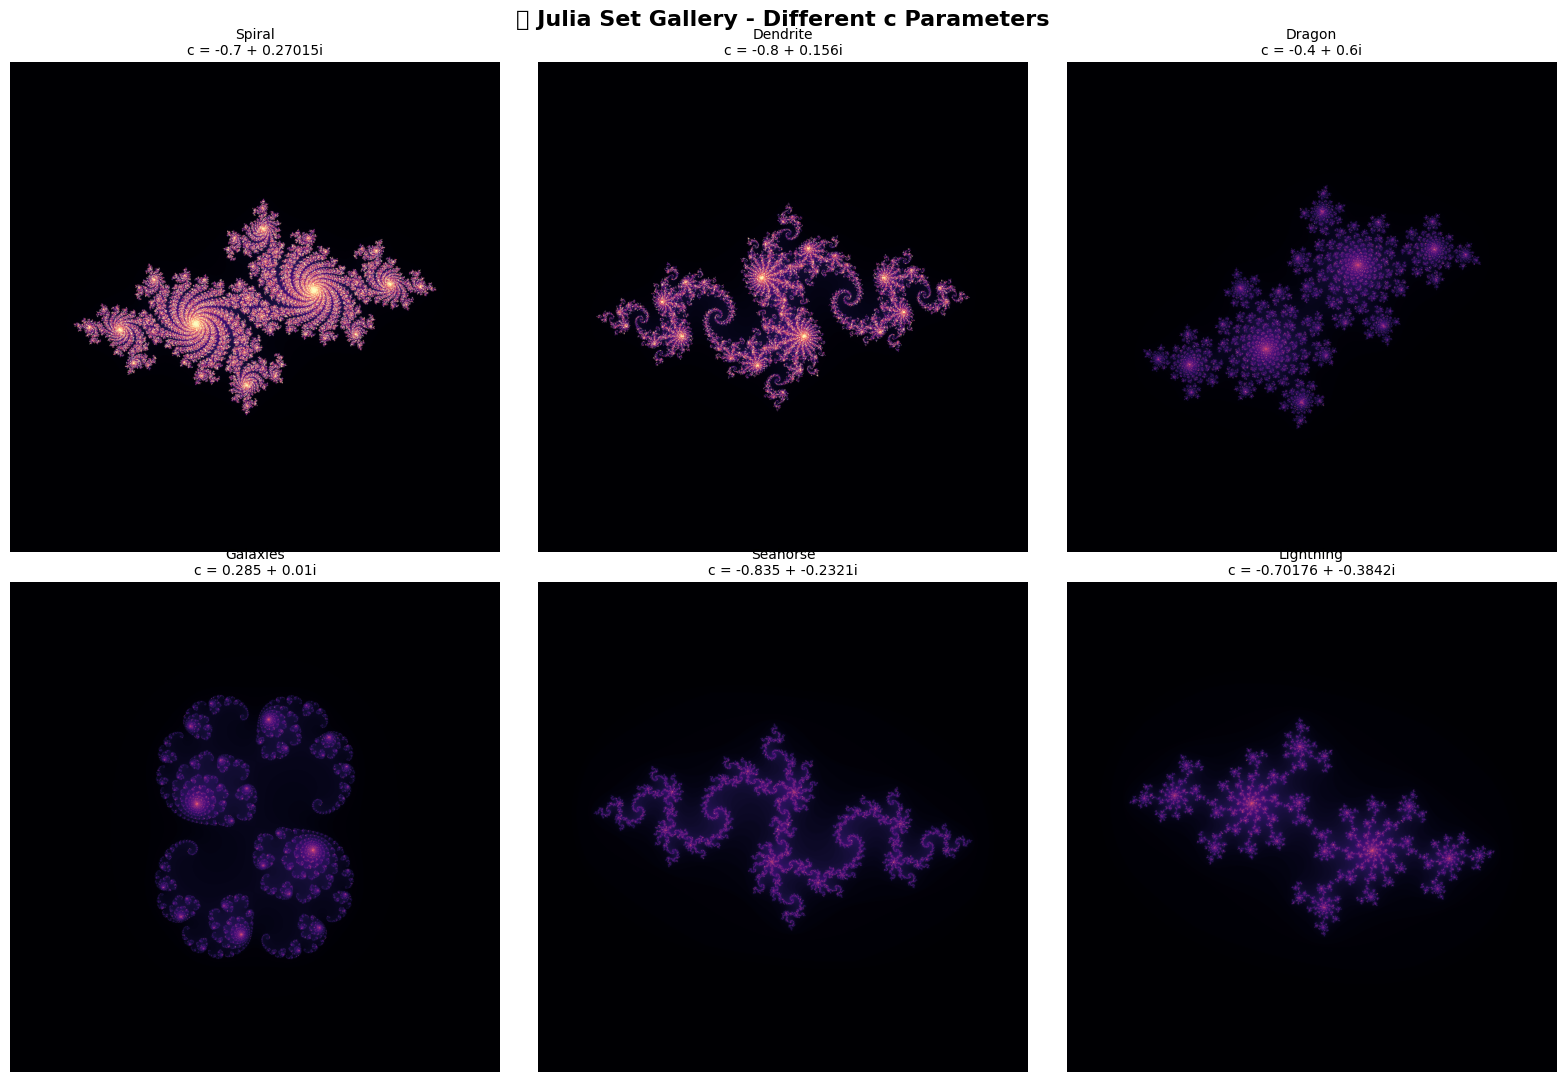

💾 Saved as julia_gallery.png


In [7]:
@jit(nopython=True, parallel=True)
def julia_set(xmin, xmax, ymin, ymax, width, height, c_real, c_imag, max_iter):
    """Generate Julia set for given c parameter"""
    x = np.linspace(xmin, xmax, width)
    y = np.linspace(ymin, ymax, height)
    result = np.zeros((height, width))
    c = complex(c_real, c_imag)
    
    for i in prange(height):
        for j in range(width):
            z = complex(x[j], y[i])
            for k in range(max_iter):
                z = z*z + c
                if abs(z) > 2:
                    result[i, j] = k + 1 - np.log(np.log2(abs(z) + 1))
                    break
            else:
                result[i, j] = max_iter
    return result

# Beautiful Julia set parameters
julia_params = [
    (-0.7, 0.27015, "Spiral"),
    (-0.8, 0.156, "Dendrite"),
    (-0.4, 0.6, "Dragon"),
    (0.285, 0.01, "Galaxies"),
    (-0.835, -0.2321, "Seahorse"),
    (-0.70176, -0.3842, "Lightning"),
]

print("🔥 Generating Julia Set Gallery...")

fig, axes = plt.subplots(2, 3, figsize=(16, 11))
axes = axes.flatten()

for idx, (c_real, c_imag, name) in enumerate(tqdm(julia_params, desc="Generating")):
    julia = julia_set(-2, 2, -2, 2, 1024, 1024, c_real, c_imag, 500)
    axes[idx].imshow(julia, cmap='magma', extent=[-2, 2, -2, 2])
    axes[idx].set_title(f'{name}\nc = {c_real} + {c_imag}i', fontsize=10)
    axes[idx].axis('off')

fig.suptitle('🔥 Julia Set Gallery - Different c Parameters', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('julia_gallery.png', dpi=150, bbox_inches='tight')
plt.show()
print("💾 Saved as julia_gallery.png")

## 6. 📊 Ultimate Performance Benchmark
Let's see what your Codespace can really do!

In [8]:
def benchmark_suite():
    """Comprehensive performance benchmark"""
    results = {}
    
    # 1. Matrix multiplication
    print("📊 Running benchmarks...\n")
    
    sizes = [1000, 2000, 3000]
    print("1️⃣ Matrix Multiplication (BLAS)")
    for size in sizes:
        a = np.random.randn(size, size)
        b = np.random.randn(size, size)
        start = time.time()
        c = a @ b
        elapsed = time.time() - start
        gflops = (2 * size**3) / elapsed / 1e9
        print(f"   {size}x{size}: {elapsed:.3f}s ({gflops:.1f} GFLOPS)")
        results[f'matmul_{size}'] = gflops
    
    # 2. FFT performance
    print("\n2️⃣ FFT Performance")
    for n in [2**20, 2**22, 2**24]:
        data = np.random.randn(n) + 1j * np.random.randn(n)
        start = time.time()
        result = np.fft.fft(data)
        elapsed = time.time() - start
        mflops = (5 * n * np.log2(n)) / elapsed / 1e6
        print(f"   N={n:,}: {elapsed:.3f}s ({mflops:.0f} MFLOPS)")
        results[f'fft_{n}'] = mflops
    
    # 3. Eigenvalue decomposition
    print("\n3️⃣ Eigenvalue Decomposition")
    for size in [500, 1000, 1500]:
        a = np.random.randn(size, size)
        a = (a + a.T) / 2  # Make symmetric
        start = time.time()
        eigvals, eigvecs = np.linalg.eigh(a)
        elapsed = time.time() - start
        print(f"   {size}x{size}: {elapsed:.3f}s")
        results[f'eig_{size}'] = elapsed
    
    # 4. Monte Carlo Pi estimation
    print("\n4️⃣ Monte Carlo Pi (vectorized)")
    for n in [10_000_000, 50_000_000, 100_000_000]:
        start = time.time()
        x = np.random.random(n)
        y = np.random.random(n)
        pi_estimate = 4 * np.sum(x**2 + y**2 <= 1) / n
        elapsed = time.time() - start
        samples_per_sec = n / elapsed / 1e6
        print(f"   N={n:,}: π≈{pi_estimate:.6f} ({samples_per_sec:.1f}M samples/s)")
        results[f'montecarlo_{n}'] = samples_per_sec
    
    # 5. Memory bandwidth
    print("\n5️⃣ Memory Bandwidth Test")
    for size_gb in [0.1, 0.5, 1.0]:
        n = int(size_gb * 1e9 / 8)
        a = np.random.randn(n)
        b = np.random.randn(n)
        start = time.time()
        c = a + b
        elapsed = time.time() - start
        bandwidth = (3 * n * 8) / elapsed / 1e9  # Read a, read b, write c
        print(f"   {size_gb}GB: {bandwidth:.1f} GB/s")
        results[f'bandwidth_{size_gb}'] = bandwidth
    
    return results

results = benchmark_suite()

# Summary visualization
print("\n" + "="*50)
print("🏆 BENCHMARK SUMMARY")
print("="*50)
print(f"Peak Matrix Multiply: {max(v for k,v in results.items() if 'matmul' in k):.1f} GFLOPS")
print(f"Peak FFT: {max(v for k,v in results.items() if 'fft' in k):.0f} MFLOPS")
print(f"Peak Memory Bandwidth: {max(v for k,v in results.items() if 'bandwidth' in k):.1f} GB/s")
print(f"Monte Carlo Throughput: {max(v for k,v in results.items() if 'montecarlo' in k):.1f}M samples/s")
print("="*50)

📊 Running benchmarks...

1️⃣ Matrix Multiplication (BLAS)
   1000x1000: 0.063s (32.0 GFLOPS)
   2000x2000: 0.273s (58.6 GFLOPS)
   3000x3000: 0.756s (71.5 GFLOPS)

2️⃣ FFT Performance
   N=1,048,576: 0.038s (2742 MFLOPS)
   N=4,194,304: 0.221s (2086 MFLOPS)
   N=16,777,216: 0.951s (2117 MFLOPS)

3️⃣ Eigenvalue Decomposition
   500x500: 0.244s
   1000x1000: 0.430s
   1500x1500: 2.782s

4️⃣ Monte Carlo Pi (vectorized)
   N=10,000,000: π≈3.141203 (45.1M samples/s)
   N=50,000,000: π≈3.141425 (27.4M samples/s)
   N=100,000,000: π≈3.141621 (27.2M samples/s)

5️⃣ Memory Bandwidth Test
   0.1GB: 16.9 GB/s
   0.5GB: 6.1 GB/s
   1.0GB: 4.3 GB/s

🏆 BENCHMARK SUMMARY
Peak Matrix Multiply: 71.5 GFLOPS
Peak FFT: 2742 MFLOPS
Peak Memory Bandwidth: 16.9 GB/s
Monte Carlo Throughput: 45.1M samples/s


## 7. 🌊 Reaction-Diffusion Pattern Generation
Creating organic patterns like those found in nature!

🌊 Generating Reaction-Diffusion Patterns...
   (This simulates 5000 timesteps per pattern)



Simulating:   0%|          | 0/4 [00:00<?, ?it/s]

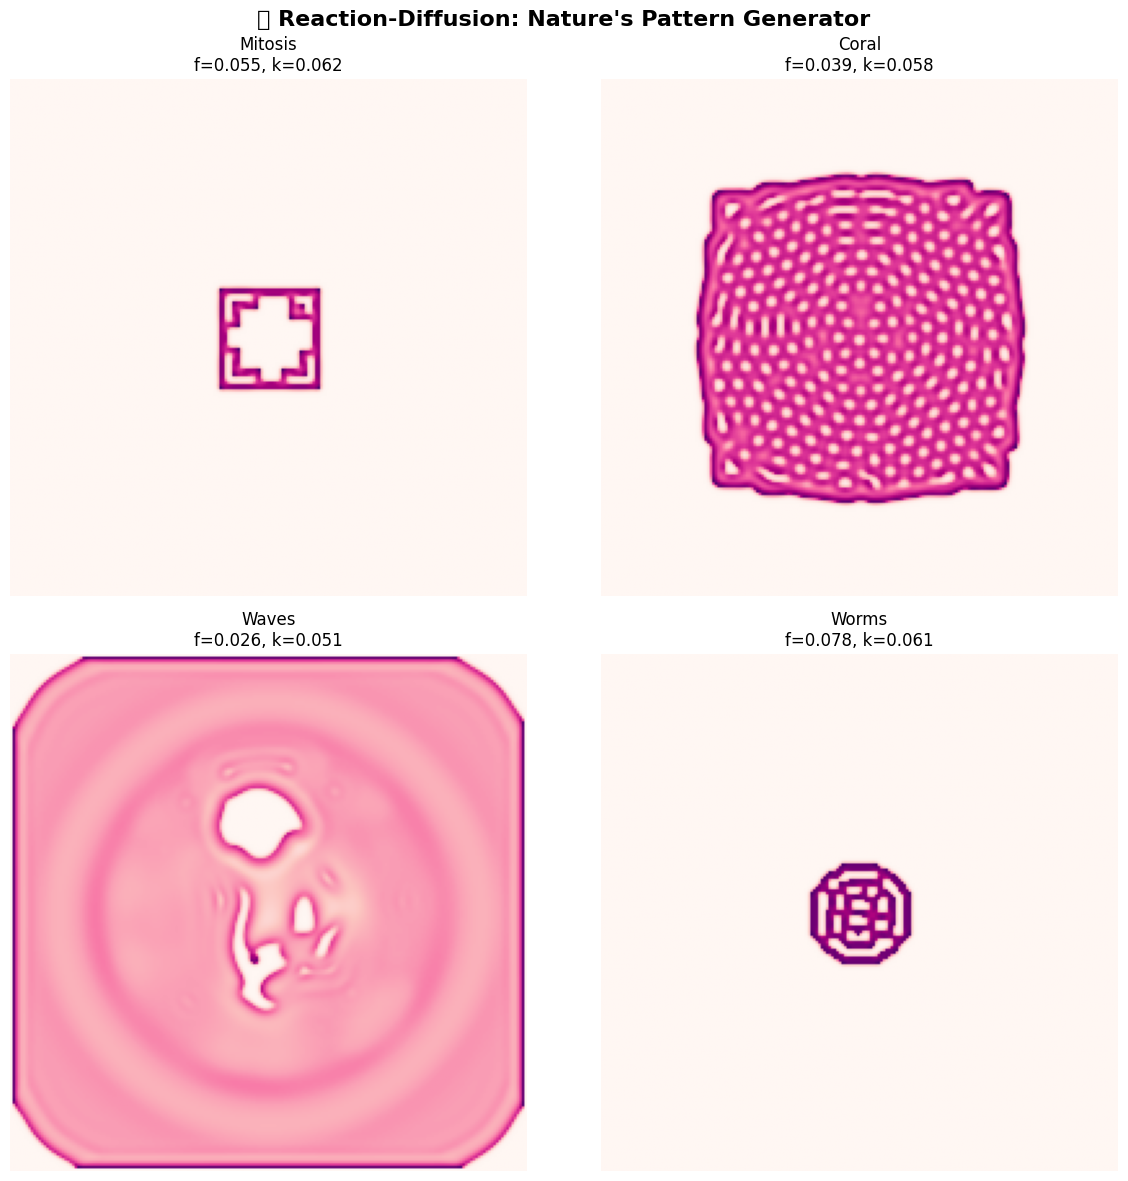

💾 Saved as reaction_diffusion.png


In [9]:
@jit(nopython=True)
def laplacian(grid):
    """Compute Laplacian using convolution"""
    h, w = grid.shape
    result = np.zeros_like(grid)
    for i in range(1, h-1):
        for j in range(1, w-1):
            result[i, j] = (
                0.05 * grid[i-1, j-1] + 0.2 * grid[i-1, j] + 0.05 * grid[i-1, j+1] +
                0.2 * grid[i, j-1] - 1.0 * grid[i, j] + 0.2 * grid[i, j+1] +
                0.05 * grid[i+1, j-1] + 0.2 * grid[i+1, j] + 0.05 * grid[i+1, j+1]
            )
    return result

def gray_scott(size=256, steps=5000, feed=0.055, kill=0.062):
    """Gray-Scott reaction-diffusion model"""
    # Initialize
    U = np.ones((size, size))
    V = np.zeros((size, size))
    
    # Seed pattern in center
    r = size // 10
    cx, cy = size // 2, size // 2
    for i in range(cx-r, cx+r):
        for j in range(cy-r, cy+r):
            if (i-cx)**2 + (j-cy)**2 < r**2:
                U[i, j] = 0.5 + 0.1 * np.random.random()
                V[i, j] = 0.25 + 0.1 * np.random.random()
    
    Du, Dv = 0.16, 0.08
    dt = 1.0
    
    for step in range(steps):
        # Compute Laplacians
        Lu = laplacian(U)
        Lv = laplacian(V)
        
        # Reaction terms
        uvv = U * V * V
        
        # Update
        U += dt * (Du * Lu - uvv + feed * (1 - U))
        V += dt * (Dv * Lv + uvv - (kill + feed) * V)
        
        # Clip values
        U = np.clip(U, 0, 1)
        V = np.clip(V, 0, 1)
    
    return U, V

# Generate different patterns
patterns = [
    (0.055, 0.062, "Mitosis"),
    (0.039, 0.058, "Coral"),
    (0.026, 0.051, "Waves"),
    (0.078, 0.061, "Worms"),
]

print("🌊 Generating Reaction-Diffusion Patterns...")
print("   (This simulates 5000 timesteps per pattern)\n")

fig, axes = plt.subplots(2, 2, figsize=(12, 12))
axes = axes.flatten()

for idx, (feed, kill, name) in enumerate(tqdm(patterns, desc="Simulating")):
    U, V = gray_scott(size=200, steps=5000, feed=feed, kill=kill)
    axes[idx].imshow(V, cmap='RdPu')
    axes[idx].set_title(f'{name}\nf={feed}, k={kill}', fontsize=12)
    axes[idx].axis('off')

fig.suptitle('🌊 Reaction-Diffusion: Nature\'s Pattern Generator', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('reaction_diffusion.png', dpi=150, bbox_inches='tight')
plt.show()
print("💾 Saved as reaction_diffusion.png")

## 🎉 Summary

We've pushed your Codespace with:
- ✅ 4K Mandelbrot fractal (8.3M pixels, 1000 iterations each)
- ✅ 50 Lorenz attractor trajectories (chaos theory)
- ✅ 1000-body gravitational simulation (200 timesteps)
- ✅ Neural network art generation (6 unique pieces)
- ✅ Julia set gallery (6 different fractals)
- ✅ Comprehensive performance benchmarks
- ✅ Reaction-diffusion pattern simulation

All images have been saved to the workspace!

In [10]:
# Final summary
print("\n" + "🎊"*25)
print("\n   CODESPACE LIMITS TEST COMPLETE!\n")
print("🎊"*25)

print("\n📁 Generated Files:")
for f in ['mandelbrot_4k.png', 'lorenz_attractor.png', 'nbody_galaxy.png', 
          'neural_art.png', 'julia_gallery.png', 'reaction_diffusion.png']:
    if os.path.exists(f):
        size = os.path.getsize(f) / 1024
        print(f"   ✅ {f} ({size:.1f} KB)")

print("\n🚀 Your Codespace handled it like a champion!")


🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊

   CODESPACE LIMITS TEST COMPLETE!

🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊🎊

📁 Generated Files:
   ✅ mandelbrot_4k.png (2756.7 KB)
   ✅ lorenz_attractor.png (502.4 KB)
   ✅ nbody_galaxy.png (105.4 KB)
   ✅ neural_art.png (928.0 KB)
   ✅ julia_gallery.png (1019.9 KB)
   ✅ reaction_diffusion.png (165.1 KB)

🚀 Your Codespace handled it like a champion!
